# Tarea 5

### André Marx Puente Arévalo

### Ejercicio 2 - Clustering Jerárquico

Utilice `scipy.cluster.hierarchy.linkage`,`scipy.cluster.hierarchy.dendrogram` y `scipy.cluster.hierarchy.fcluster` con los datos `Datos_CJerarquico.csv`. 

Realice y responda lo siguiente:

1. Grafique los datos en el eje x y en el eje y.
    1. Personalice la gráfica (Por ejemplo, cambié los puntos de circulos por estrellas)
    2. Coloque una etiqueta a cada observación para identificarla. 
2. Realice un dendograma aglomerativo para 4 de los métodos (single, complete, average, weighted, centroid, median, ward). Personalice cada gráfica, coloque el titulo de la gráfica de acuerdo al método usado. 
    1. ¿Observa alguna diferencia significativa entre los métodos? Detalle su respuesta
    2. Investiga y describa brevemente los 3 métodos restantes (aquellos a los que no hicieron dendograma).
    3. Seleccione un método que considere adecuado. 
3. Realice un dendograma para 4 de las siguientes métricas (euclidean, cityblock, cosine, correlation, hamming, jaccard, yule, dice, mahalanobis). Personalice cada gráfica, coloque el titulo de la gráfica de acuerdo a la métrica usada. 
    1. ¿Observa alguna diferencia significativa entre los métodos? Detalle su respuesta.
    2. Investiga y describa brevemente las 5 métricas restantes (aquellos a los que no hicieron dendograma).
    3. Seleccione una métrica que considere adecuada.
4. Realice dos gráfica de los datos coloreando los puntos de acuerdo al grupo asignado.
    1. Utilice las gráficas de los incisos 2 y 3 para sugerir un número de grupos.
    2. Para la primer gráfica utilice el método seleccionado en el inciso 2 y la métrica seleccionada en el inciso 3. Personalice los colores de la gráfica.
    3. Para la segunda gráfica utilice algún método y métrica que le hayan parecido interesantes (diferentes a las métricas seleccionadas).
5. Concluya
    1. Analizando el inciso 2, ¿Todos los métodos llegan a la misma jerarquía de grupos?
    2. Analizando el inciso 3, ¿Todos las métricas llegan a la misma jerarquía de grupos?
    3. ¿Usted considera que la realmente existen $\hat{k}$ grupos? Argumente su respuesta

### Ejercicio 1 - KMeans

Aplique `class sklearn.cluster.KMeans` con los datos `Datos_KMeans.csv`. 

Realice y responda lo siguiente:

**1.** Grafique los datos en el eje x y en el eje y. Personalice la gráfica, por ejemplo, cambié los puntos de circulos por estrellas.

In [1]:
import pandas            as pd    # Biblioteca para trabajar con DataFrames
import numpy             as np    # Biblioteca para trabajar con algebra lineal
import matplotlib.pyplot as plt   # Biblioteca para realizar graficas
import warnings

from sklearn.cluster import KMeans                            
from sklearn.metrics import accuracy_score, confusion_matrix 

warnings.filterwarnings("ignore")

In [2]:
datos = pd.read_csv("Datos_KMeans.csv")
datos.head()

,X1,X2
0,-9.599269,10.070699
1,-3.898435,-0.410129
2,-6.065070,-0.514075
3,6.861656,-2.167734
4,-6.050202,-0.507990


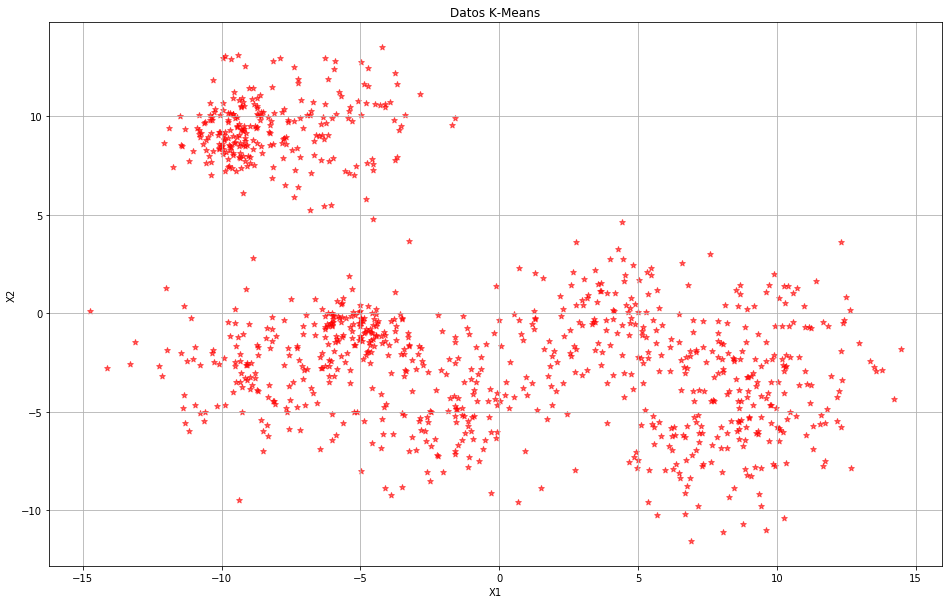

In [3]:
# Graficamos la nube de puntos
plt.subplots( nrows = 1, ncols = 1, figsize=(16,10) )
plt.title("Datos K-Means")
plt.scatter( x=datos.iloc[:,0], y=datos.iloc[:,1], label="Puntos", alpha = 0.6, marker = "*", color = "red")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.show()

**2.** Realice una gráfica del $WCSS$ en función de la cantidad de grupos (desde 1 grupo hasta 15).
   

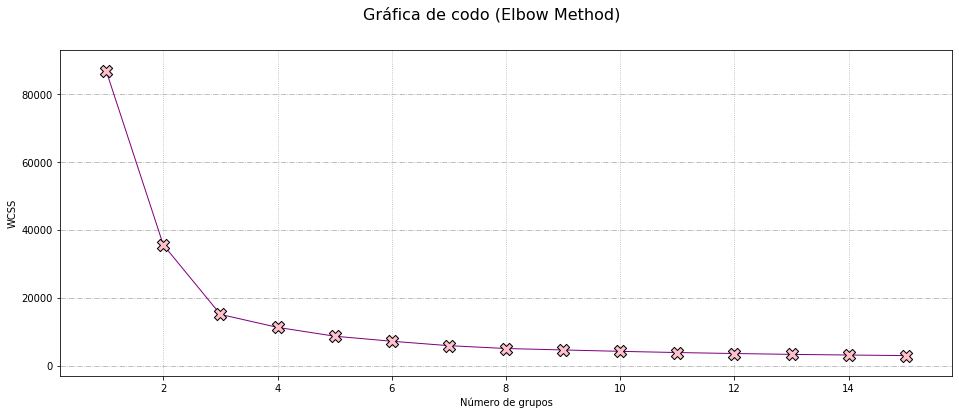

In [4]:
# Inicializamos la lista donde se guardaran los WCSS para cada k
wcss = []

# Definimos el numero de clusters por cada itecarion
num_clusters = list(range(1, 15+1))

# Calculamos el WCSS para cada k
for k in num_clusters:
    wcss.append( KMeans(n_clusters = k, init = 'k-means++', n_init = 100, random_state = 0).fit( datos ).inertia_ )
    
# Hacemos la grafica de codo
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6) )
fig.suptitle("Gráfica de codo (Elbow Method)", fontsize=16)
ax.set_axisbelow(True)
ax.xaxis.grid(linestyle=":")
ax.yaxis.grid(linestyle="-.")
ax.set_xlabel('Número de grupos')
ax.set_ylabel('WCSS')
ax.plot( num_clusters, wcss, c="purple", linewidth = 1, linestyle = '-', zorder=2 )
ax.scatter( num_clusters, wcss, s=150, edgecolor = "black", zorder=3, marker = "X", c = "pink")
plt.show()

   1. Utilizando el método *Elbow Method* sugiera un número adecuado para el parámetro $k$.
   
   Vamos a escoger $k$ = 3, ya que, después de 3 ya no disminuye de manera significativa el $WCSS$.
   
   
   2. Explique lo que mide $WCSS$ e interprete la gráfica.
   
   Ésta métrica mide que tan cercanos están los puntos a sus respectivo centroide.
   La gráfica nos dice que a medida de que incrementamos el número de centroides, cuánto disminuye el $WCSS$. 
   
   
   3. Realice una gráfica de los datos coloreando los puntos de acuerdo al grupo asignado. Personalice los colores de la gráfica.

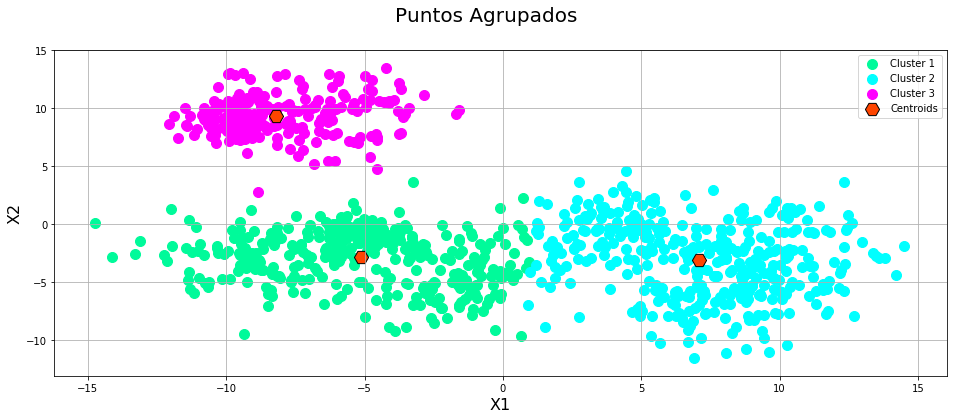

In [5]:
# Creamos el modelo
modeloKM = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, random_state = 0).fit( datos )

# Estimamos el grupo al que pertenecen los puntos
y_kmeans = modeloKM.predict( datos )

# Graficamos los puntos de acuerdo al grupo
plt.subplots(nrows=1, ncols=1, figsize=(16,6) )
plt.suptitle('Puntos Agrupados', fontsize=20)
plt.xlabel('X1', fontsize = 16)
plt.ylabel('X2', fontsize = 16)
plt.grid()
#Graficamos las nubes de puntos por colores
plt.scatter(datos.iloc[y_kmeans == 0, 0], datos.iloc[y_kmeans == 0, 1], s = 100, c = 'mediumspringgreen', label = 'Cluster 1')
plt.scatter(datos.iloc[y_kmeans == 1, 0], datos.iloc[y_kmeans == 1, 1], s = 100, c = 'aqua', label = 'Cluster 2')
plt.scatter(datos.iloc[y_kmeans == 2, 0], datos.iloc[y_kmeans == 2, 1], s = 100, c = 'magenta', label = 'Cluster 3')
#Graficamos los centroides
plt.scatter(modeloKM.cluster_centers_[:, 0], modeloKM.cluster_centers_[:, 1], edgecolor = "black", s = 200, c = 'orangered', marker = 'H', label = 'Centroids')
plt.legend()
plt.show()

**3.** Utilice otra métrica para sugerir un número adecuado para el parámetro $k$. (Por ejemplo,`silhouette_score`, aunque es libre de elegir alguna otra).
   1. Gráfique esta nueva métrica en función de la cantidad de grupos y sugiera un número adecuado para el parámetro $k$.

Vamos a utilizar como métrica: silhouette_score

In [6]:
from sklearn.metrics import silhouette_score

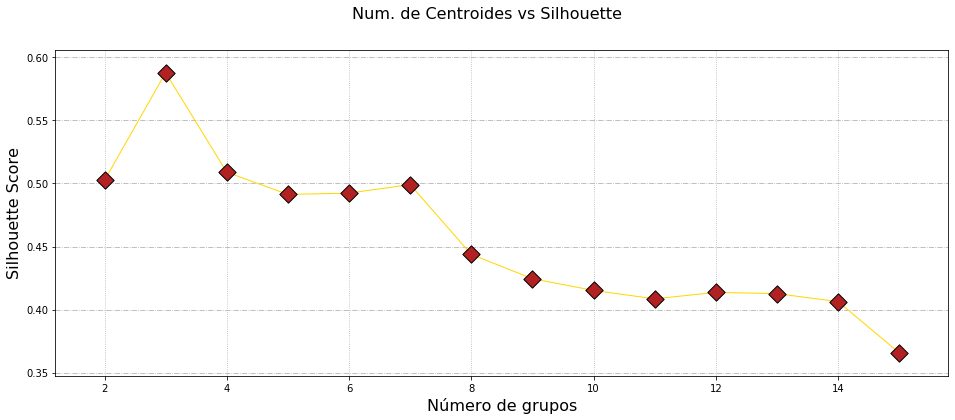

In [7]:
# Inicializamos la lista donde se guardaran los silhouette_score para cada k
SS = []
modeloKM_SS = 0

# Calculamos el silosilhouette_score para cada k
for k in range(2, 16):
    modeloKM_SS = KMeans(n_clusters = k, init = 'k-means++', n_init = 10, random_state = 0).fit( datos )
    SS.append(silhouette_score(X = datos, labels = modeloKM_SS.labels_))

# Graficamos esta metrica
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6) )
fig.suptitle("Num. de Centroides vs Silhouette", fontsize=16)
ax.set_axisbelow(True)
ax.xaxis.grid(linestyle=":")
ax.yaxis.grid(linestyle="-.")
ax.set_xlabel('Número de grupos', fontsize = 16)
ax.set_ylabel('Silhouette Score', fontsize = 16)
ax.plot( range(2,16), SS, c="gold", linewidth = 1, linestyle = '-', zorder=2 )
ax.scatter( range(2,16), SS, s=150, edgecolor = "black", zorder=3, marker = "D", c = "firebrick")
plt.show()

Por los resultados obtenidos escogemos k = 3, ya que, buscamos el Silhoette_Score más cercano a 1. Esto se explicará en la siguiente pregunta.

   2. Explique brevemente lo que mide la métrica seleccionada.


#### Silhouette

Primero para entender bien ésta métrica vamos a definir lo siguiente: 

   - Cohesión (denotada por $a(X)$): Es la distancia promedio de $X$ a todos los puntos del mismo cluster.
   - Separación (denotada por $b(X)$): Es la sitancia promedio de $X$ a los putos demás puntos del otro cluster.

Por lo que el Silhouette para $X$ es: 


$$ S(X) = \frac{b(X)-a(X)}{max(b(X), a(X))} $$


Finalmente el Coeficiente de Silhouette ($CS$) es:


$$ CS = \frac{1}{N} \sum_{i=1}^{N}S(X_{i}) $$

Entonces, el **silhouette score** (o coeficiente de Silhouette) es una medida de la similitud de un objeto con su propio cluster (cohesión) en comparación con otros clústeres (separación). Mide cómo los grupos están definidos.

Donde el criterio de selección es el siguiente:

- Si $CS = 1$ $\Rightarrow$ Buen agrupamiento
- Si $CS = 0$ $\Rightarrow$ Indiferente
- Si $CS = -1 \Rightarrow $ Mal agrupamiento

   3. Grafique los datos coloreando los puntos de acuerdo al grupo asignado. Personalice los colores de la gráfica.

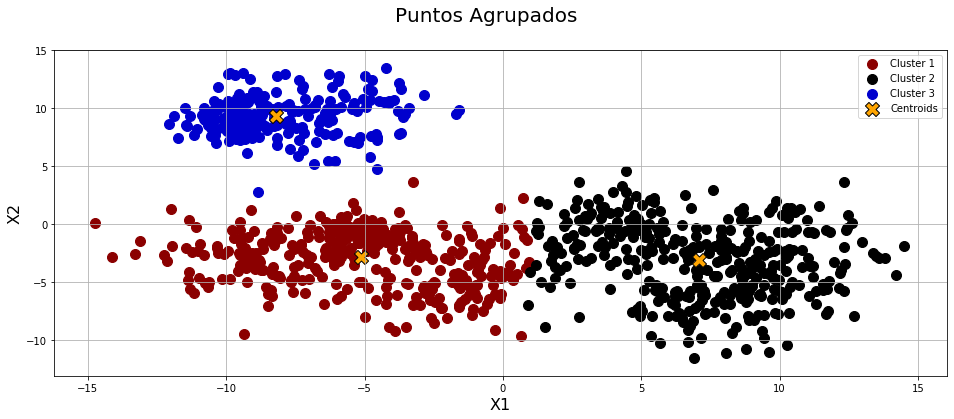

In [8]:
# Creamos el modelo
modeloKM = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, random_state = 123).fit( datos )

# Estimamos el grupo al que pertenecen los puntos
y_kmeans = modeloKM.predict( datos )

# Graficamos los puntos de acuerdo al grupo
plt.subplots(nrows=1, ncols=1, figsize=(16,6) )
plt.suptitle('Puntos Agrupados', fontsize=20)
plt.xlabel('X1', fontsize = 16)
plt.ylabel('X2', fontsize = 16)
plt.grid()
#Graficamos las nubes de puntos por colores
plt.scatter(datos.iloc[y_kmeans == 0, 0], datos.iloc[y_kmeans == 0, 1], s = 100, c = 'darkred', label = 'Cluster 1')
plt.scatter(datos.iloc[y_kmeans == 1, 0], datos.iloc[y_kmeans == 1, 1], s = 100, c = 'black', label = 'Cluster 2')
plt.scatter(datos.iloc[y_kmeans == 2, 0], datos.iloc[y_kmeans == 2, 1], s = 100, c = 'mediumblue', label = 'Cluster 3')
#Graficamos los centroides
plt.scatter(modeloKM.cluster_centers_[:, 0], modeloKM.cluster_centers_[:, 1], edgecolor = "black", s = 200, c = 'orange', marker = 'X', label = 'Centroids')
plt.legend()
plt.show()

**4.** Investigue la métrica `homogeneity_score` para seleccionar el número de grupos y expliquela brevemente.

**Homogeneity score**: Esta métrica usa el análisis de entropía condicional. Devuelve un valor entre 0 y 1. Siendo mayor cuanto más homogéneos es el resultado. Es decir mira que cada grupo contiene sólo miembros de una sola clase.

**5.** Concluya
   1. ¿Las métricas que utilizó en el inciso 2 y 3 indicaron la misma cantidad de grupos?
   
   
    Sí, en ambos incisos obtuvimos k = 3.
   
   2. Si tuviese que elegir alguna de las dos métricas, ¿Cuál elegiría y por qué?
   
   Escogería la métrica de Silhouette, porque es más sencillo seleccionar el número adecuado para la k, ya que, solo escogeríamos el valor más cercano a 1.
   
   
   3. ¿Usted considera que la realmente existen $\hat{k}$ grupos? Argumente su respuesta
   
   Sí, ya que, desde la primera gráfica en donde sólo pusimos la nube de puntos, se alcanza a apreciar que solo hay 3 grupos.

Finalmente, ajustaremos un modelo de K-Means utilizando **Spark**.

In [1]:
# Creamos la sesion de spark
if __name__=="__main__":
    try:
        from pyspark.sql import SparkSession
    except:
        import findspark
        findspark.init()
        from pyspark.sql import SparkSession
    spark=SparkSession.builder \
    .master("local[4]") \
    .appName("tarea5") \
    .getOrCreate()

In [2]:
# Cargamos los datos usando spark
data = spark.read.csv("Datos_KMeans.csv",header=True,inferSchema=True)
data.show(10)

+-------------------+--------------------+
|                 X1|                  X2|
+-------------------+--------------------+
| -9.599269390558957|  10.070698650169517|
| -3.898435381701722|-0.41012877972457196|
| -6.065069625620739| -0.5140747759743534|
|  6.861655908434452| -2.1677337631452565|
|  -6.05020153925732| -0.5079901493198564|
| -8.198084204314172| -1.3890285560550957|
|  9.787563226249935|  -4.667808633003919|
|-0.1719371834237835|  -1.030777941599466|
| 4.7484577322174575| -3.0793813522148326|
| -9.883795498023131|   7.219694423690442|
+-------------------+--------------------+
only showing top 10 rows



In [3]:
# Importamos lo necesario para ajustar el modelo
from pyspark.ml import Pipeline
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import VectorAssembler,MinMaxScaler

In [4]:
# Transformamos los datos
vec = VectorAssembler(inputCols=['X1', 'X2'],outputCol='features')
sca = MinMaxScaler(inputCol='features',outputCol='features_mm')

# Ajustamos el modelo de K-Means
KM = KMeans(k=3).setSeed(123)
pipe = Pipeline(stages=[vec, sca, KM])
modelo = pipe.fit(data)

# Obtenemos la metrica de silhouette
prediccion = modelo.transform(data)
evaluacion = ClusteringEvaluator()
print('Silhouette:', evaluacion.evaluate(prediccion))

Silhouette: 0.7741374633492396
